In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "Dataset/test/0_label.png"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

: 

: 

In [2]:
path0 = "Outputs/experiment_08-07_16.26.29/inference/testData/11_label.png"
path1 = "Outputs/experiment_08-07_16.26.29/inference/testData/11_0.578_predict.png"
img1 = cv2.imread(path0, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)


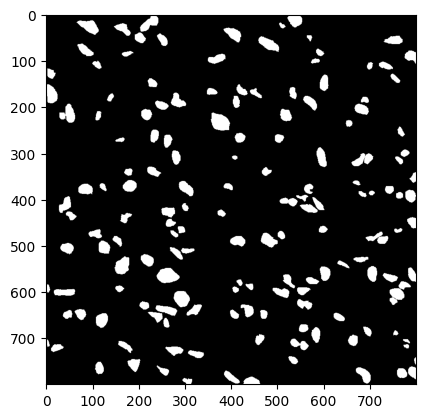

In [25]:
# plot image
diff = img1-img2
#cv2.imwrite('Outputs/experiment_08-07_16.26.29/inference/11_diff.png',diff*255)
plt.imshow(img1, cmap='gray')

In [36]:
## threshold
th, threshed = cv2.threshold(img1, 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]


## filter by area
s1= 0
s2 = 800
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))

Dots number: 139


In [9]:
f = open("Outputs/experiment_08-31_19.33.30/metrics.txt", "r")
fReader = f.read()
f.close()
fReader.split("\n")

['===============Training Losses ===========',
 '0.5440219735167154, 0.42766494087364804, 0.36453277663126715, 0.32987777085461245, 0.3079360687594444, 0.29234677614498533, 0.28058555716661937, 0.2715981964856732, 0.26448648908791184, 0.2588027921890972, ',
 '',
 '===============Training Accuracies ===========',
 '0.5595658049349744, 0.704000868692052, 0.7594713221049425, 0.7868110312088303, 0.8013290879077961, 0.8095905141263163, 0.8149431748110125, 0.8189839563965574, 0.8223803673975039, 0.8250423974416428, ',
 '',
 '===============Validation Losses ===========',
 '0.4584355317620617, 0.35159373214399375, 0.30182913873934186, 0.27481267514704455, 0.25883903647286927, 0.24626989532199373, 0.2380041125848237, 0.23165188609349607, 0.2260491258781466, 0.22245482598691677, ',
 '',
 '===============Validation Accuracies ===========',
 '0.6116459136860137, 0.7114388790194835, 0.7708766950099958, 0.8028713091455325, 0.8161316495953184, 0.8240090604583021, 0.8282848126960524, 0.83392137790769

In [3]:
fReader = fReader.split("\n")
trainingLoss = fReader[1]
trainingAccuracy = fReader[4]
validationLoss = fReader[7]
validationAccuracy = fReader[10]


In [4]:
# convert string array into float array
def getArray(arrayStr):
    arrayStr = arrayStr.split(",")
    array = []
    for i in arrayStr:
        array.append(float(i))
    return array

In [5]:
print(validationAccuracy)
print(validationAccuracy[0:-2])
print(getArray(validationAccuracy[0:-2]))

0.8679753598097515, 0.8739430601271851, 0.8815649874561178, 0.880100353601924, 0.8821441663111583, 0.8856476898638593, 0.8793043651000417, 0.8906713297288584, 0.8882826900124401, 0.8885895831230135, 0.8872236384606054, 0.8896015289675548, 0.8888720201919257, 0.8897122140226885, 0.8799254277091366, 0.8879405280459469, 0.8874098033197426, 0.8829156033641947, 0.8882309538764525, 0.8797312486464901, 0.888552126262326, 0.8905100597844317, 0.881199501613221, 0.8880346885767019, 0.8865705444793892, 0.8888557882495799, 0.8874382473817215, 0.8901084782233483, 0.882284567524066, 0.8891042858026782, 0.8892353434719708, 0.8810951261532312, 0.8858270490104927, 0.8849659991691688, 0.8899471573950898, 0.8835365769265839, 0.8860548559254833, 0.8731511741342421, 0.8867825583250833, 0.8832996300033054, 0.8796907005930206, 0.8887673139870291, 0.8813072672085048, 0.8843502539204975, 0.883887122004367, 0.8859039726432237, 0.8882740588424701, 0.8801507413163688, 0.8843232664082039, 0.8879462079536721, 
0.86

In [6]:
trainingLoss = getArray(trainingLoss[0:-2])
trainingAccuracy = getArray(trainingAccuracy[0:-2])
validationLoss = getArray(validationLoss[0:-2])
validationAccuracy = getArray(validationAccuracy[0:-2])

[INFO]: Plot Generation


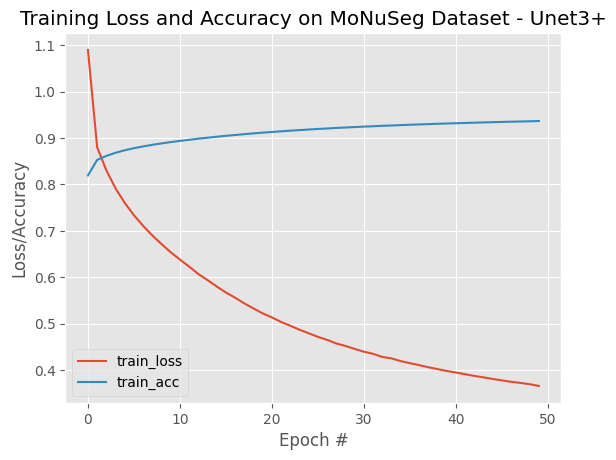

In [7]:
# plot graph for training loss and accuracy and validation loss and accuracy
print("[INFO]: Plot Generation")
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), trainingLoss, label="train_loss")
#plt.plot(np.arange(0, N), validationLoss, label="val_loss")
plt.plot(np.arange(0, N), trainingAccuracy, label="train_acc")
#plt.plot(np.arange(0, N), validationAccuracy, label="val_acc")
title = "Training Loss and Accuracy on MoNuSeg Dataset - Unet3+"
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [4]:
f = open("log/log-08-31.txt", "r")
fReader = f.read()
f.close()
fReader = fReader.split("\n")

In [5]:
train_loss = []
train_mIoU = []
train_acc = []
val_loss = []
val_mIoU = []
val_acc = []

In [6]:

for line in fReader:
    if line.startswith("train_loss"):
        train_loss.append(float(line.split(":")[1].strip()))
    elif line.startswith("train_mIoU"):
        train_mIoU.append(float(line.split(":")[1].strip()))
    elif line.startswith("train_acc"):
        train_acc.append(float(line.split(":")[1].strip()))
    elif line.startswith("val_loss"):
        val_loss.append(float(line.split(":")[1].strip()))
    elif line.startswith("val_mIoU"):
        val_mIoU.append(float(line.split(":")[1].strip()))
    elif line.startswith("val_acc"):
        val_acc.append(float(line.split(":")[1].strip()))

[INFO]: Plot Generation


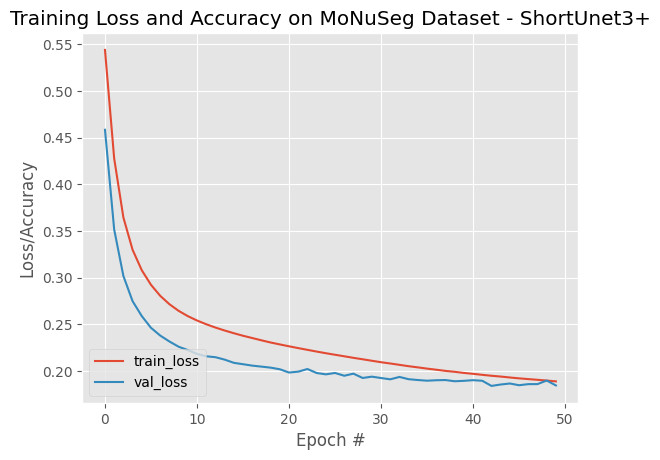

In [8]:
# plot graph for training loss and accuracy and validation loss and accuracy
print("[INFO]: Plot Generation")
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), train_loss, label="train_loss")
#plt.plot(np.arange(0, N), train_acc, label="train_acc")
plt.plot(np.arange(0, N), val_loss, label="val_loss")
#plt.plot(np.arange(0, N), val_acc, label="val_acc")
title = "Training Loss and Accuracy on MoNuSeg Dataset - ShortUnet3+"
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot_loss.png")

In [94]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


image_path = 'Dataset/test/0.png'
image = cv2.imread(image_path)

window_size = (800, 800) # Size of the sliding window
step_size = 50        # Step size of the sliding window




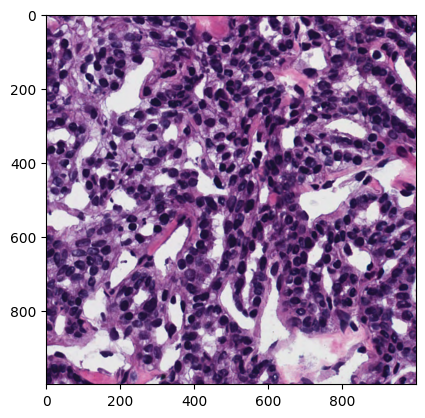

In [95]:
 # show rgb image from bgr image 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [20]:
count = 0
darkening_factor = 0.5 # Factor by which to darken the pixels outside the rectangle

for x in range(0, image.shape[0] - window_size[0], step_size):
    for y in range(0, image.shape[1] - window_size[1], step_size):
        print(x, y)
        
        # Create a mask of ones with the same shape as the image
        mask = np.ones_like(image, dtype=np.float32) * darkening_factor
        
        # Set the region inside the rectangle to white (all ones)
        mask[x:x + window_size[0], y:y + window_size[1]] = 1
        
        # Create a copy of the original image and darken the area outside the rectangle
        darkened_image = (np.copy(image) * mask).astype(np.uint8)
        
        # Draw the rectangle on the darkened image
        patch = cv2.rectangle(darkened_image, (y, x), (y + window_size[1], x + window_size[0]), (0, 255, 0), 2)
        
        # Save the patch image
        cv2.imwrite('Dataset/sample/patches/slidingWindow/patch_' + str(count) + '.png', patch)
        count += 1

0 0
0 50
0 100
0 150
50 0
50 50
50 100
50 150
100 0
100 50
100 100
100 150
150 0
150 50
150 100
150 150


In [32]:
from image_augmentation import rotate_crop_random as rotate_crop
from image_augmentation import resize_image
rotate_random = np.random.randint(low=0, high=360, size=20)

In [33]:
count = 0
for i in range(20):
    modImage, flag = rotate_crop(image, rotate_random[i])
    # Save the patch image
    cv2.imwrite('Dataset/sample/patches/rotate/patch_' + str(count) + '.png', resize_image(modImage, (512, 512)))
    count += 1

In [7]:
from image_augmentation import magnify_image
magnify_random = np.random.uniform(low=1, high=1.5, size=20)
magnify_random

array([1.09832519, 1.49973848, 1.3940303 , 1.28701837, 1.14446045,
       1.15371308, 1.2483453 , 1.17447138, 1.13809985, 1.33438924,
       1.22573291, 1.42769074, 1.11811449, 1.44887444, 1.27551384,
       1.25984898, 1.0308667 , 1.06989759, 1.18610578, 1.18670612])

In [8]:
count = 0
for i in range(20):
    modImage = magnify_image(image, magnify_random[i])
    # Save the patch image
    cv2.imwrite('Dataset/sample/patches/scale/patch_' + str(count) + '.png', modImage)
    count += 1

In [98]:
from image_augmentation import elastic_transform

In [107]:
count = 0
for i in range(20):
    modImage = elastic_transform(image, alpha=300, sigma=30)
    # Save the patch image
    cv2.imwrite('Dataset/sample/patches/elastic/patch_' + str(count) + '.png', modImage)
    count += 1

In [12]:
from image_augmentation import flip_lr, flip_ud
flip_random = np.random.uniform(size=20)
flip_random

array([0.89736404, 0.97618357, 0.90595628, 0.89324642, 0.56680678,
       0.94354247, 0.3006943 , 0.61421444, 0.93427493, 0.44935672,
       0.84802706, 0.00921676, 0.97003766, 0.45640437, 0.79752184,
       0.04263091, 0.47404388, 0.5342305 , 0.25673882, 0.86518864])

In [16]:
count = 0
cv2.imwrite('Dataset/sample/patches/flips/patch_' + str(count) + '.png', image)
count += 2
flipped_image, flip_flag = flip_ud(image, flip_random[0])
cv2.imwrite('Dataset/sample/patches/flips/patch_' + str(count) + '.png', flipped_image)

True

In [17]:
from image_augmentation import adjust_gamma
gamma_values = [0.5, 1.0, 1.5]

In [20]:
cv2.imwrite('Dataset/sample/patches/gamma/patch_' + str(0) + '.png', image)
for i, gamma in enumerate(gamma_values):
    corrected_image = adjust_gamma(image, gamma)
    cv2.imwrite('Dataset/sample/patches/gamma/patch_' + str(i+1) + '.png', corrected_image)

In [109]:
import torch
from torchvision import transforms
import torchstain
import cv2
import matplotlib.pyplot as plt


In [145]:
img = cv2.imread("Dataset/test/0.png")
target = cv2.imread("Dataset/sample/target.png")


In [140]:
def machenkoNormal(img, target):
    T = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x*255)
    ])
    t_to_transform = T(img)
    normalizer = torchstain.normalizers.MacenkoNormalizer(backend='torch')
    normalizer.fit(T(target))
    norm, H, E = normalizer.normalize(I=t_to_transform, stains=True)
    return norm.numpy().astype(np.uint8)


In [133]:
def reinhardNormal(img, target):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    T = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x*255)
    ])
    t_to_transform = T(img)
    normalizer = torchstain.normalizers.ReinhardNormalizer(backend='torch')
    normalizer.fit(T(target))
    norm = normalizer.normalize(I=t_to_transform)
    return norm.numpy().astype(np.uint8)


In [151]:
import numpy as np
from sklearn.decomposition import NMF

def vahadane_stain_normalization(target_img, source_img, beta=0.15, alpha=1):
    # Convert images to OD space, adding a small constant to avoid division by zero
    target_od = -np.log((target_img + 1) / (256 - target_img + 1e-6))
    source_od = -np.log((source_img + 1) / (256 - source_img + 1e-6))


    # Reshape OD images
    target_od_reshaped = target_od.reshape((-1, 3))
    source_od_reshaped = source_od.reshape((-1, 3))

    # Apply NMF
    nmf_target = NMF(n_components=2).fit(target_od_reshaped)
    nmf_source = NMF(n_components=2).fit(source_od_reshaped)

    # Get stain color bases
    target_stain = nmf_target.components_
    source_stain = nmf_source.components_

    # Get concentrations
    target_concentration = nmf_target.transform(target_od_reshaped)
    source_concentration = nmf_source.transform(source_od_reshaped)

    # Normalize stain color bases
    max_target_concentration = np.percentile(target_concentration, 99, axis=0).reshape((1,2))
    target_stain_normalized = target_stain * (max_target_concentration**-beta)

    max_source_concentration = np.percentile(source_concentration, 99, axis=0).reshape((1,2))
    source_stain_normalized = source_stain * (max_source_concentration**-beta)

    # Map target stain to source stain
    target_to_source_stain = target_stain_normalized @ np.linalg.pinv(source_stain_normalized)

    # Reconstruct image in OD space
    new_concentrations = target_concentration @ target_to_source_stain
    new_od_reshaped = new_concentrations @ source_stain_normalized

    # Convert back to RGB
    new_od = new_od_reshaped.reshape(target_img.shape)
    normalized_img = (256 * np.exp(-new_od) - 1).clip(0, 255).astype(np.uint8)

    return normalized_img


ModuleNotFoundError: No module named 'spams'

In [150]:
imgNormal = vahadane_stain_normalization(img, target)
plt.imshow(imgNormal)


/tmp/ipykernel_2060/1556815382.py:6: RuntimeWarning: divide by zero encountered in log
  target_od = -np.log((target_img + 1) / (256 - target_img + 1e-6))
/tmp/ipykernel_2060/1556815382.py:7: RuntimeWarning: divide by zero encountered in log
  source_od = -np.log((source_img + 1) / (256 - source_img + 1e-6))


ValueError: Input X contains infinity or a value too large for dtype('float64').

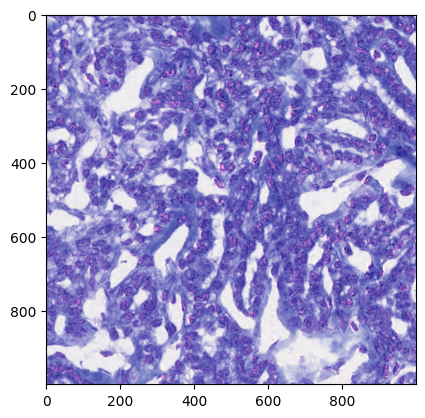

In [143]:
imgNormal = machenkoNormal(np.copy(img), target)

imgNormal = cv2.cvtColor(imgNormal, cv2.COLOR_RGB2BGR)
cv2.imwrite('Dataset/sample/machenkoNormal2.png', imgNormal)
plt.imshow(imgNormal)

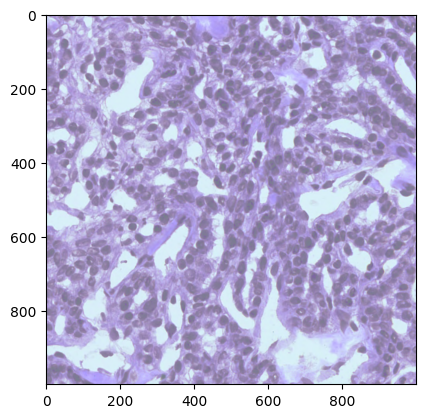

In [142]:
imgNormal = reinhardNormal(np.copy(img), target)
imgNormal = cv2.cvtColor(imgNormal, cv2.COLOR_RGB2BGR)
cv2.imwrite('Dataset/sample/reinhardNormal2.png', imgNormal)
plt.imshow(imgNormal)

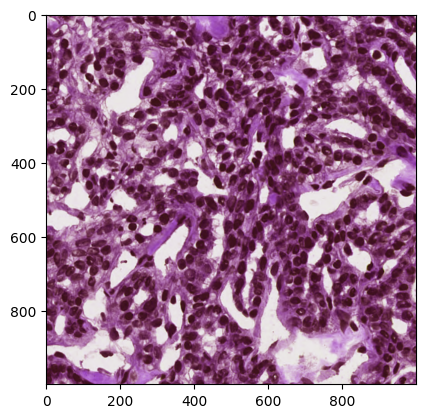

In [65]:
target = np.copy(img)
to_transform = np.copy(img)

T = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x*255)
])

normalizer = torchstain.normalizers.MacenkoNormalizer(backend='torch')
normalizer.fit(T(target))

t_to_transform = T(to_transform)
norm, H, E = normalizer.normalize(I=t_to_transform, stains=True)
plt.imshow(norm)

# Sampling

In [2]:
import os
import cv2
from natsort import natsorted
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
# Load images from path
def load_images(path):
    images = []
    print(f"loading Images from path: {path}")
    for filename in tqdm(natsorted(os.listdir(path))):
        if filename.endswith("_label.png"):
            continue
        img = cv2.imread(os.path.join(path,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
image_patches = load_images("Dataset/valNormal/")

loading Images from path: Dataset/valNormal/


  0%|          | 0/9504 [00:00<?, ?it/s]

100%|██████████| 9504/9504 [00:12<00:00, 790.68it/s]


In [5]:
len(image_patches)

4752

In [6]:
image_patches_array = np.array([img.flatten() for img in image_patches])
scaler = StandardScaler()
image_patches_scaled = scaler.fit_transform(image_patches_array)
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
image_patches_tsne = tsne.fit_transform(image_patches_array)


In [7]:
print("Shape of image_patches_tsne:", image_patches_tsne.shape)  # Should be (4800, 2)

Shape of image_patches_tsne: (4752, 2)


In [8]:
# Apply DBSCAN
dbscan = DBSCAN(eps=4, min_samples=5)
clusters = dbscan.fit_predict(image_patches_tsne)
print("Unique clusters:", np.unique(clusters))  # You should see more than just -1

Unique clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95]


In [9]:
# Get unique clusters
unique_clusters = np.unique(clusters)

# Sampling
samples = []
for cluster in unique_clusters:
    if cluster == -1:  # Ignore noise
        continue

    cluster_indices = np.where(clusters == cluster)[0]
    cluster_patches = [image_patches[i] for i in cluster_indices]

    centroid = np.mean(image_patches_tsne[cluster_indices], axis=0)
    distances = np.linalg.norm(image_patches_tsne[cluster_indices] - centroid, axis=1)

    center_sample = cluster_patches[np.argmin(distances)]
    boundary_sample = cluster_patches[np.argmax(distances)]

    samples.append(center_sample)
    samples.append(boundary_sample)

batch = samples

print("Number of samples in batch:", len(batch))  # Should be non-zero



Number of samples in batch: 192


In [73]:
#batch

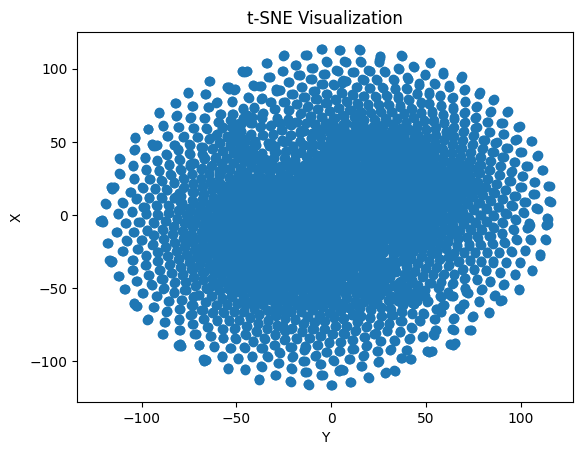

In [10]:
import matplotlib.pyplot as plt

plt.scatter(image_patches_tsne[:, 0], image_patches_tsne[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Y')
plt.ylabel('X')
plt.show()


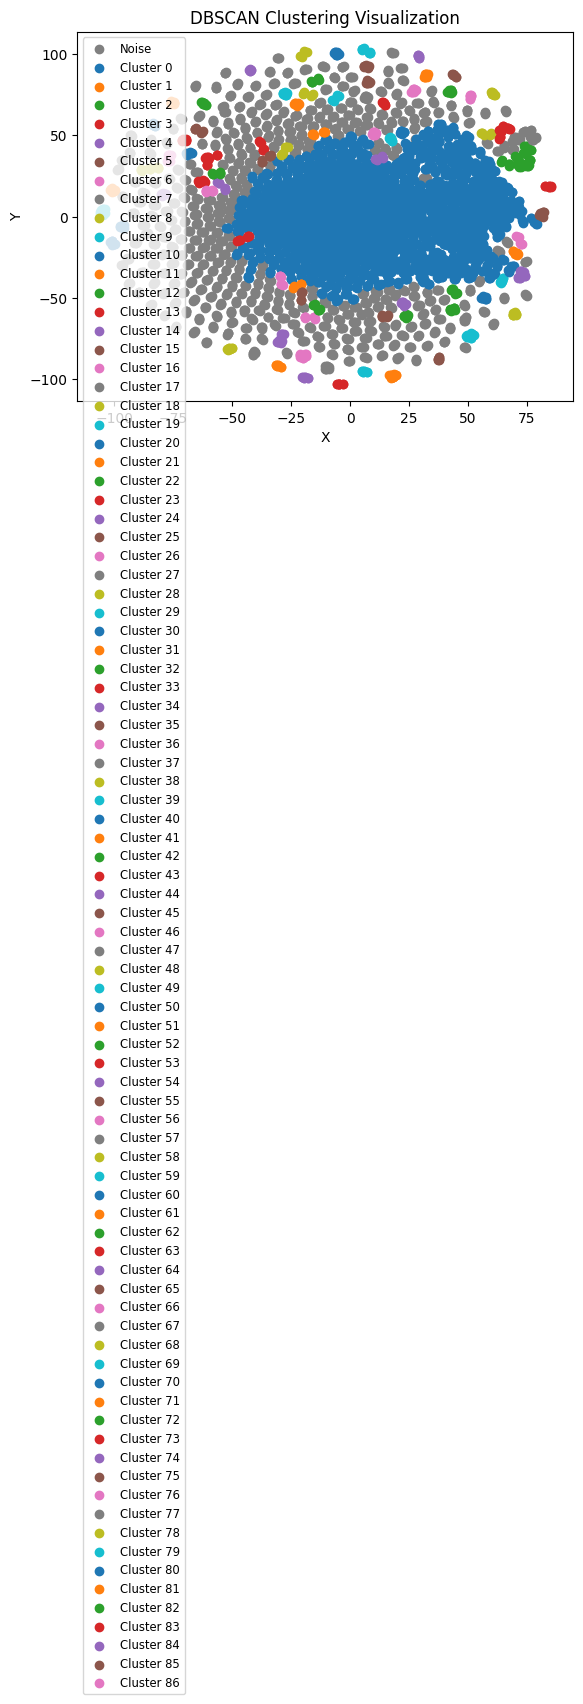

In [75]:
import matplotlib.pyplot as plt

# Scatter plot for each cluster
for cluster in unique_clusters:
    if cluster == -1:  # Noise
        plt.scatter(image_patches_tsne[clusters == cluster, 0], image_patches_tsne[clusters == cluster, 1], c='gray', label='Noise')
    else:
        plt.scatter(image_patches_tsne[clusters == cluster, 0], image_patches_tsne[clusters == cluster, 1], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best', fontsize='small')
plt.show()


Pre-trained Approach

In [11]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Define a transform to preprocess the images
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load a pre-trained model
model = models.resnet18(pretrained=True)
model.eval()

# Remove the final classification layer
model = torch.nn.Sequential(*(list(model.children())[:-1]))

# Process image patches using the pre-trained model
features = []
for img in tqdm(image_patches):
    img_tensor = transform(img).unsqueeze(0)
    with torch.no_grad():
        feature = model(img_tensor)
        features.append(feature.squeeze().numpy())

features = np.array(features)

/home/blue/projects/MoNuSeg/monuSegEnv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/blue/projects/MoNuSeg/monuSegEnv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 4752/4752 [05:35<00:00, 14.16it/s]


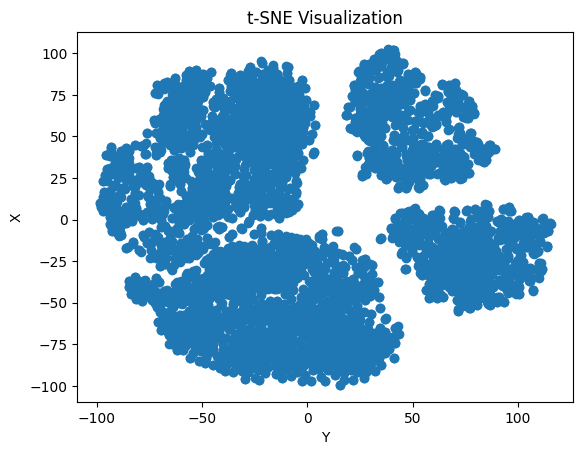

In [12]:
# Apply t-SNE with adjusted parameters
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
image_patches_tsne = tsne.fit_transform(features)
plt.scatter(image_patches_tsne[:, 0], image_patches_tsne[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Y')
plt.ylabel('X')
plt.show()

Unique clusters: [-1  0  1  2  3  4  5  6]


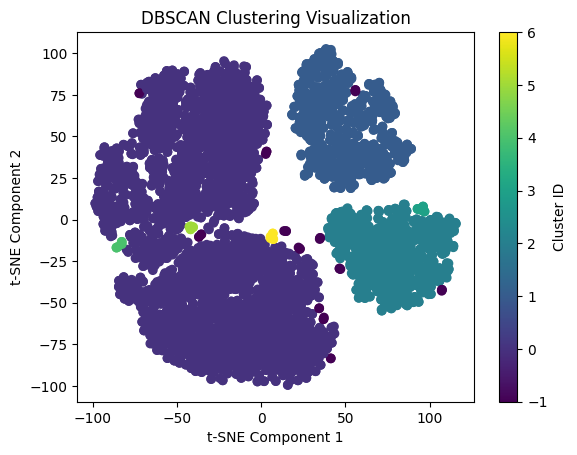

In [13]:
# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
clusters = dbscan.fit_predict(image_patches_tsne)
print("Unique clusters:", np.unique(clusters))  # You should see more than just -1

# Plot the results
plt.scatter(image_patches_tsne[:, 0], image_patches_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster ID')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [13]:
# Get unique clusters
unique_clusters = np.unique(clusters)

# Sampling
samples = []
for cluster in unique_clusters:
    if cluster == -1:  # Ignore noise
        continue

    cluster_indices = np.where(clusters == cluster)[0]
    cluster_patches = [image_patches[i] for i in cluster_indices]

    centroid = np.mean(image_patches_tsne[cluster_indices], axis=0)
    distances = np.linalg.norm(image_patches_tsne[cluster_indices] - centroid, axis=1)

    center_sample = cluster_patches[np.argmin(distances)]
    boundary_sample = cluster_patches[np.argmax(distances)]

    samples.append(center_sample)
    samples.append(boundary_sample)

batch = samples

print("Number of samples in batch:", len(batch))  # Should be non-zero



Number of samples in batch: 28


In [93]:
# Function to sample from center and boundary
def sample_from_cluster(cluster_indices, k=1):
    centroid = np.mean(image_patches_tsne[cluster_indices], axis=0)
    distances = np.linalg.norm(image_patches_tsne[cluster_indices] - centroid, axis=1)

    center_indices = cluster_indices[np.argsort(distances)[:k]]
    boundary_indices = cluster_indices[np.argsort(distances)[-k:]]

    return center_indices, boundary_indices

# Get unique clusters excluding noise
valid_clusters = [c for c in np.unique(clusters) if c != -1]

# Determine how many samples to take from each cluster
samples_per_cluster = 16 // (2 * len(valid_clusters))
if samples_per_cluster == 0:
    samples_per_cluster = 1

batch_indices = []
for cluster in valid_clusters:
    cluster_indices = np.where(clusters == cluster)[0]
    center_indices, boundary_indices = sample_from_cluster(cluster_indices, k=samples_per_cluster)

    batch_indices.extend(center_indices)
    batch_indices.extend(boundary_indices)

# If the batch is not full, fill it with additional samples
while len(batch_indices) < 16:
    additional_cluster = np.random.choice(valid_clusters)
    additional_indices = np.where(clusters == additional_cluster)[0]
    center_indices, _ = sample_from_cluster(additional_indices, k=1)
    batch_indices.extend(center_indices)

# Get the corresponding image patches
batch = [image_patches[i] for i in batch_indices[:16]]

# Confirm the batch size
print("Batch size:", len(batch))  # Should be 16


Batch size: 16


## Using DINOv2


In [14]:
import torch
from torchvision import transforms
import cv2
from tqdm import tqdm
from natsort import natsorted
import os
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [25]:
dino_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')
dino_vits14 = dino_vits14.cuda()
#dinov2_vitl14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')
#dinov2_vitl14 = dinov2_vitl14.cuda()
#dinov2_vitg14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitg14')
#dinov2_vitg14 = dinov2_vitg14.cuda()

Using cache found in /home/blue/.cache/torch/hub/facebookresearch_dinov2_main


In [16]:
# Load images from path
def load_images(path):
    images = []
    print(f"loading Images from path: {path}")
    for filename in tqdm(natsorted(os.listdir(path))):
        if filename.endswith("_label.png"):
            continue
        img = cv2.imread(os.path.join(path,filename))
        if img is not None:
            images.append(img)
    return images

In [17]:
image_patches = load_images("Dataset/val")

loading Images from path: Dataset/val


100%|██████████| 9504/9504 [00:40<00:00, 235.43it/s]


In [17]:


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [26]:


# Process image patches using the pre-trained model
features = []
for img in tqdm(image_patches):
    img_tensor = transform(img).unsqueeze(0)
    img_tensor = img_tensor.to('cuda')
    with torch.no_grad():
        feature = dino_vits14(img_tensor)
        feature = feature.cpu()
        features.append(feature.squeeze().numpy())

features = np.array(features)

100%|██████████| 4752/4752 [01:57<00:00, 40.39it/s]


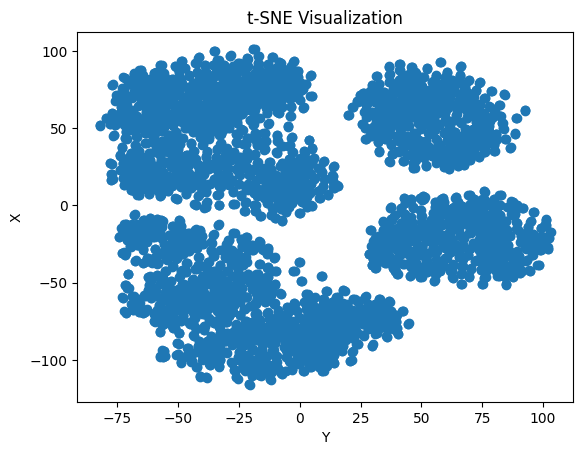

In [27]:
# Apply t-SNE with adjusted parameters
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
image_patches_tsne = tsne.fit_transform(features)
plt.scatter(image_patches_tsne[:, 0], image_patches_tsne[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Y')
plt.ylabel('X')
plt.show()

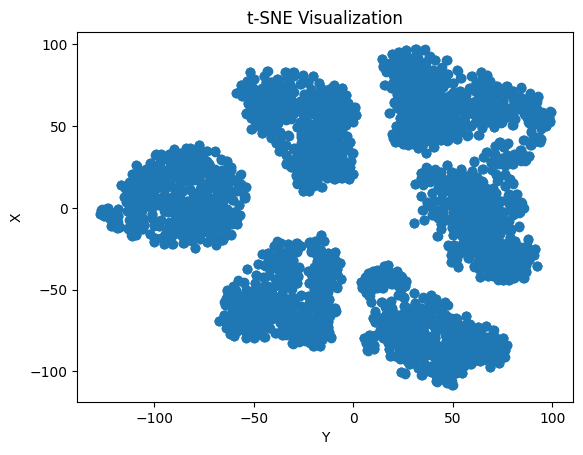

In [43]:
# Apply t-SNE with adjusted parameters
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
image_patches_tsne = tsne.fit_transform(features)
plt.scatter(image_patches_tsne[:, 0], image_patches_tsne[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Y')
plt.ylabel('X')
plt.show()

Unique clusters: [-1  0  1  2  3  4  5  6]


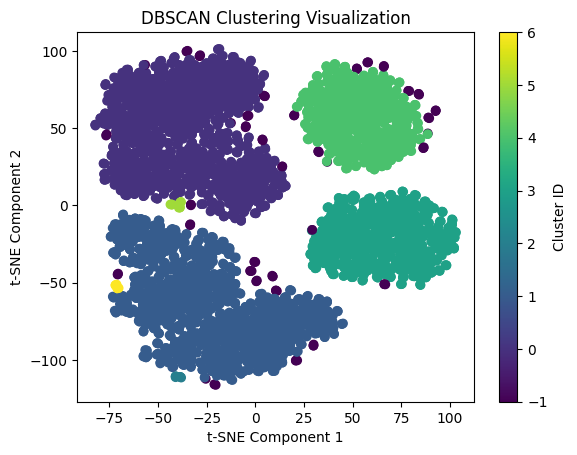

In [28]:
# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
clusters = dbscan.fit_predict(image_patches_tsne)
print("Unique clusters:", np.unique(clusters))  # You should see more than just -1

# Plot the results
plt.scatter(image_patches_tsne[:, 0], image_patches_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster ID')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()